In [1]:
from sklearn.decomposition import PCA
import numpy as np
import optuna
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                        roc_curve, auc, roc_auc_score, log_loss)
from sklearn.preprocessing import LabelEncoder, label_binarize
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from typing import Dict, List, Any, Tuple
warnings.filterwarnings('ignore')

/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        pre-void
1        pre-void
2        pre-void
3        pre-void
4        pre-void
          ...    
4777    post-void
4778    post-void
4779    post-void
4780    post-void
4781    post-void
Name: label, Length: 4782, dtype: object

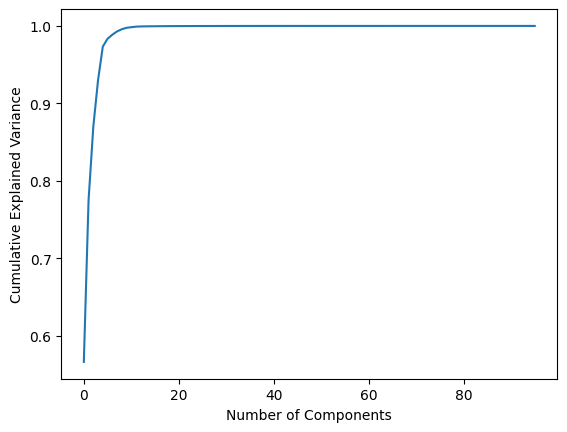

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_path = '/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/modified/feature_extracted_data/three_class_pp_1s_0.5.csv'
features = pd.read_csv(data_path)
features.drop(columns=['center_time', 'start_time', 'end_time'], inplace=True)


X = features.drop(columns=['label', 'experiment_id'])
y = features['label']
groups = features['experiment_id']

# results_df = nested_cv(X, y, groups, exp_name)

# Apply PCA to entire dataset for EDA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explore explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# # Visualize first 2 principal components
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')

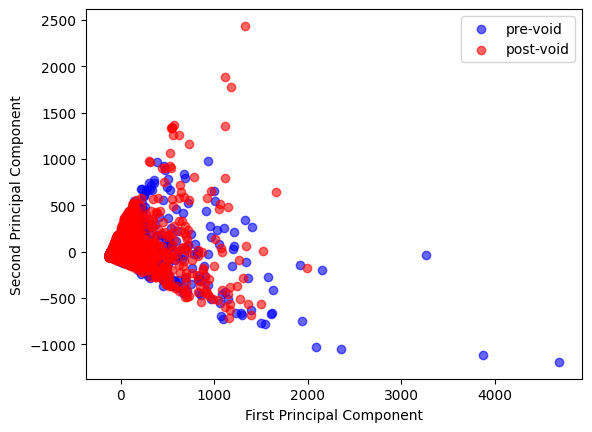

In [4]:
# Separate the classes
pre_void_mask = y == 'pre-void'
post_void_mask = y == 'post-void'

plt.scatter(X_pca[pre_void_mask, 0], X_pca[pre_void_mask, 1], 
           c='blue', label='pre-void', alpha=0.6)
plt.scatter(X_pca[post_void_mask, 0], X_pca[post_void_mask, 1], 
           c='red', label='post-void', alpha=0.6)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

Text(0, 0.5, 'Second Principal Component')

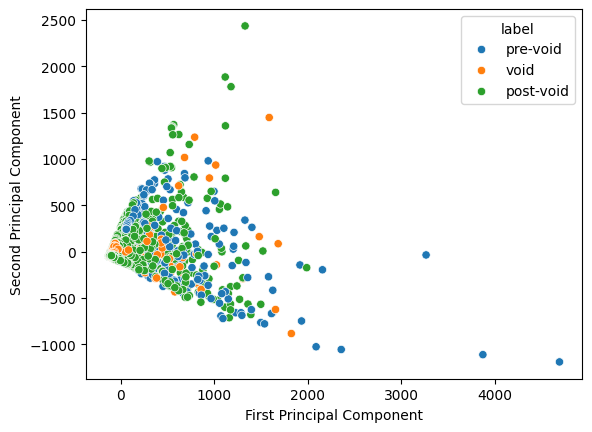

In [3]:

import seaborn as sns
import pandas as pd

# Create DataFrame for easier plotting
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'label': y
})

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')